In [ ]:
!pip install geopandas
!pip install rioxarray

In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray
import rioxarray
import warnings
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
import numpy as npy

import matplotlib.pyplot as plt

Mounted at /content/drive


In [30]:
NDVI_2013 = xarray.open_rasterio("/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2013.tif")
NDVI_2014 = xarray.open_rasterio("/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2014.tif")
NDVI_2015 = xarray.open_rasterio("/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2015.tif")
NDVI_2016 = xarray.open_rasterio("/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2016.tif")
NDVI_2017 = xarray.open_rasterio("/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2017.tif")
NDVI_2018 = xarray.open_rasterio("/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2018.tif")
NDVI_2019 = xarray.open_rasterio("/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2019.tif")
NDVI_2020 = xarray.open_rasterio("/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2020.tif")
NDVI_2021 = xarray.open_rasterio("/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2021.tif")
NDVI_2022 = xarray.open_rasterio("/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2022.tif")


Text(0.5, 0, 'Longitud (E°)')

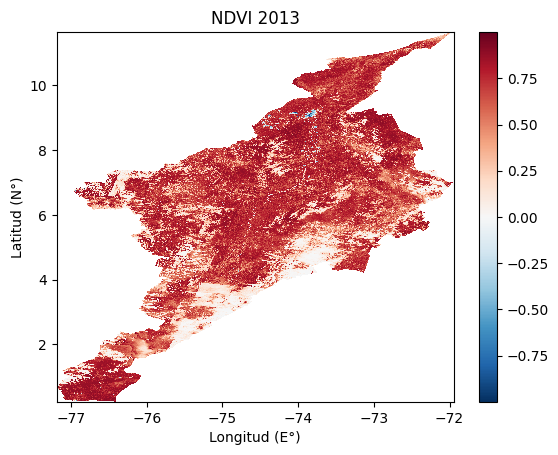

In [3]:
NDVI_2013.plot()
plt.title("NDVI 2013")
plt.ylabel('Latitud (N°)')
plt.xlabel('Longitud (E°)')

Text(0.5, 0, 'Longitud (E°)')

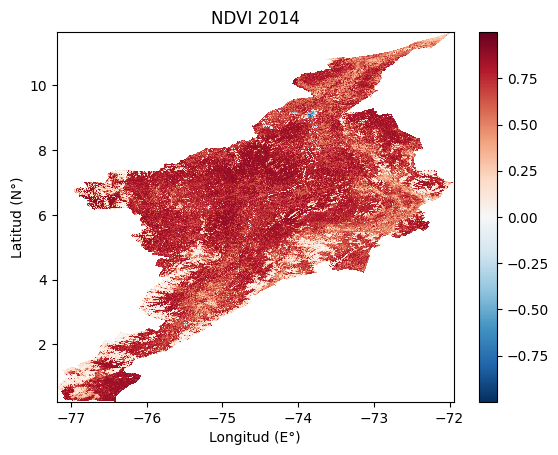

In [4]:
NDVI_2014.plot()
plt.title("NDVI 2014")
plt.ylabel('Latitud (N°)')
plt.xlabel('Longitud (E°)')

Text(0.5, 0, 'Longitud (E°)')

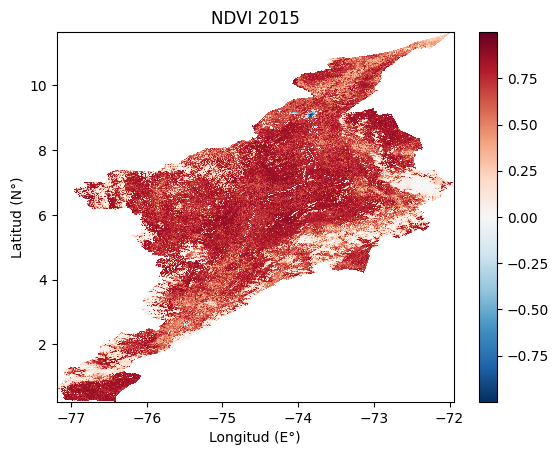

In [4]:
NDVI_2015.plot()
plt.title("NDVI 2015")
plt.ylabel('Latitud (N°)')
plt.xlabel('Longitud (E°)')

Text(0.5, 0, 'Longitud (E°)')

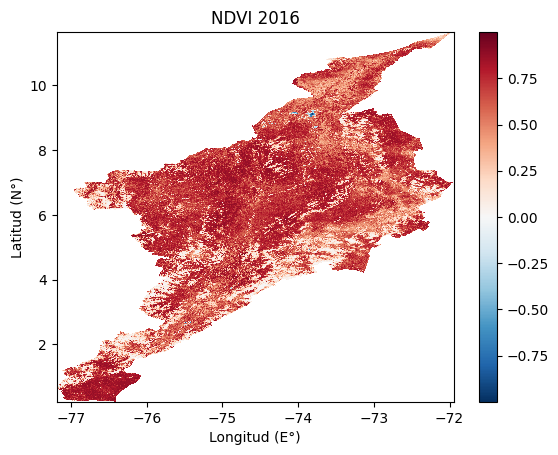

In [3]:
NDVI_2016.plot()
plt.title("NDVI 2016")
plt.ylabel('Latitud (N°)')
plt.xlabel('Longitud (E°)')

Text(0.5, 0, 'Longitud (E°)')

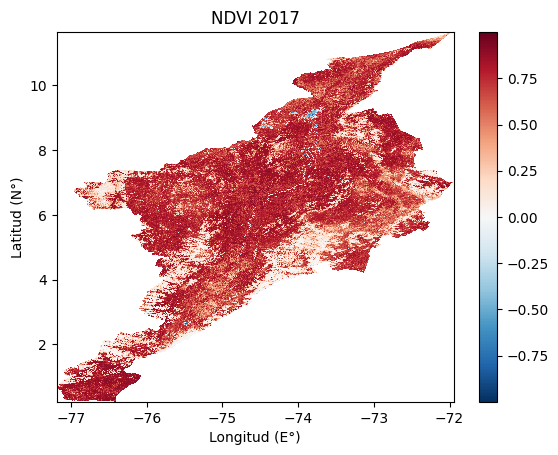

In [3]:
NDVI_2017.plot()
plt.title("NDVI 2017")
plt.ylabel('Latitud (N°)')
plt.xlabel('Longitud (E°)')

Text(0.5, 0, 'Longitud (E°)')

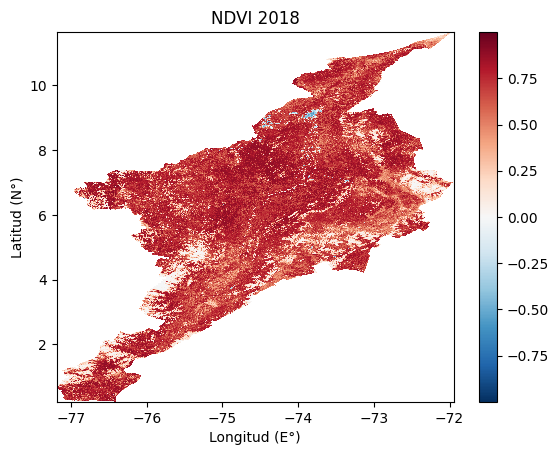

In [3]:
NDVI_2018.plot()
plt.title("NDVI 2018")
plt.ylabel('Latitud (N°)')
plt.xlabel('Longitud (E°)')

Text(0.5, 0, 'Longitud (E°)')

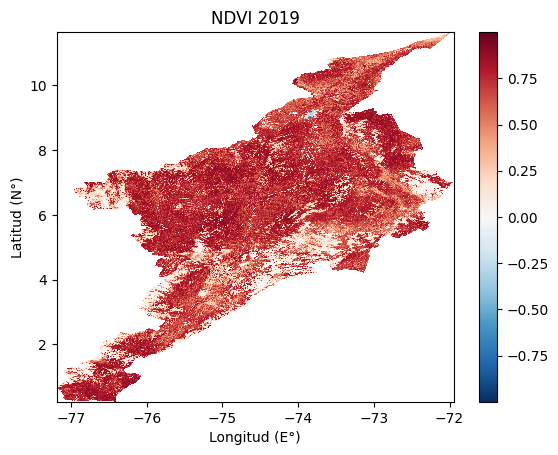

In [3]:
NDVI_2019.plot()
plt.title("NDVI 2019")
plt.ylabel('Latitud (N°)')
plt.xlabel('Longitud (E°)')

Text(0.5, 0, 'Longitud (E°)')

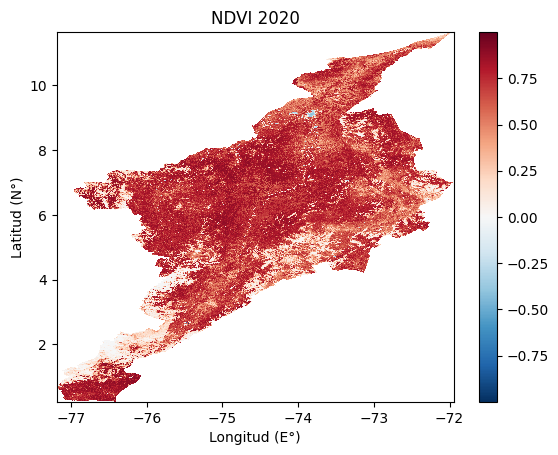

In [3]:
NDVI_2020.plot()
plt.title("NDVI 2020")
plt.ylabel('Latitud (N°)')
plt.xlabel('Longitud (E°)')

Text(0.5, 0, 'Longitud (E°)')

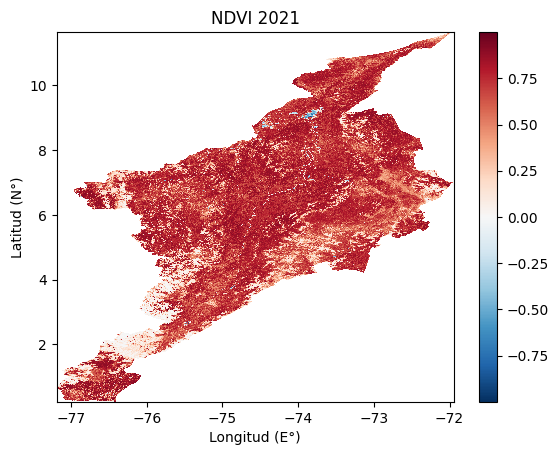

In [4]:
NDVI_2021.plot()
plt.title("NDVI 2021")
plt.ylabel('Latitud (N°)')
plt.xlabel('Longitud (E°)')

Text(0.5, 0, 'Longitud (E°)')

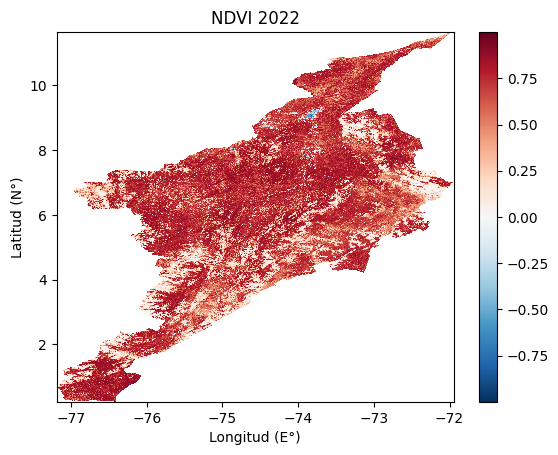

In [3]:
NDVI_2022.plot()
plt.title("NDVI 2022")
plt.ylabel('Latitud (N°)')
plt.xlabel('Longitud (E°)')

1
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
(91554080,)


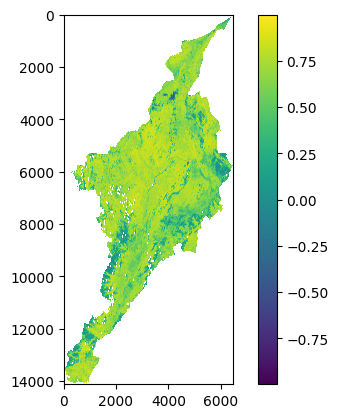

In [ ]:
from osgeo import gdal
#importar uan imagen compuesta
composite = gdal.Open('/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2018.tif')

#para saber el número de bandas
print(composite.RasterCount)

#matriz
raster = composite.GetRasterBand(1)
type(raster)

#para obtener el gdal.band
banda = composite.GetRasterBand(1)
type(banda)
aspecto = banda.ReadAsArray()
print(aspecto)
type(aspecto)
aspecto.shape
aspecto_vector=aspecto.ravel()
print(aspecto_vector.shape)
aspecto_vector
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
aspecto_vector_MenM.shape
np.isnan(aspecto_vector)
type(aspecto_vector_MenM)
aspecto_S=pd.Series(aspecto_vector_MenM)
type(aspecto_S)
aspecto_S.head(5)

#para convertirlo en array
b1 = banda.ReadAsArray()


#para graficar uan matriz se utiliza la funcion imshow

plt.imshow(b1)
plt.colorbar()



<Axes: >

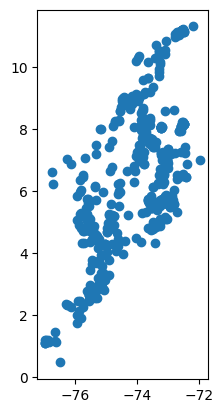

In [4]:
gt_points1 = pd.read_csv("/content/drive/MyDrive/analisis geoespacial/Entregas/estaciones.csv")
gt_points1.head(2)
pt_geoms1 = gpd.points_from_xy(x=gt_points1["longitud"],
                                    y=gt_points1["latitud"],
                                    crs="EPSG:4326"
                                   )
pt_geoms1.crs
import geopandas as gpd
gt_points1 = gpd.GeoDataFrame(gt_points1,geometry=pt_geoms1)
gt_points1.plot()

17.650     4
185.100    4
7.500      4
3.800      4
28.350     4
          ..
19.420     1
30.680     1
13.640     1
21.930     1
1.566      1
Name: Valor, Length: 3346, dtype: int64

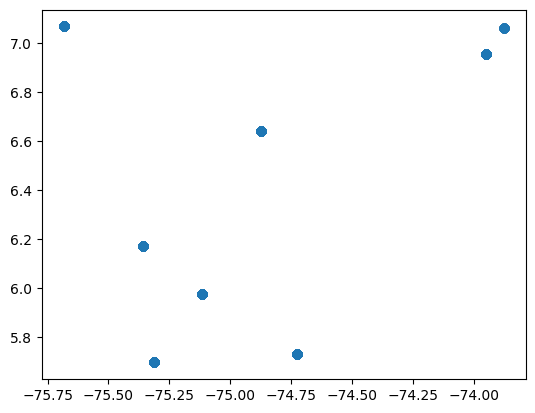

In [4]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/analisis geoespacial/Entregas/excel.csv.csv")
df.head(2)
pt_geoms = gpd.points_from_xy(x=df["Longitud"],
                                    y=df["Latitud"],
                                    crs="EPSG:4326"
                                   )
pt_geoms.crs
import geopandas as gpd
df = gpd.GeoDataFrame(df,geometry=pt_geoms)
df.plot()

df.describe()

df["Valor"].value_counts()

# gt_points = gpd.GeoDataFrame(gt_points,geometry=pt_geoms)
# gt_points.plot()

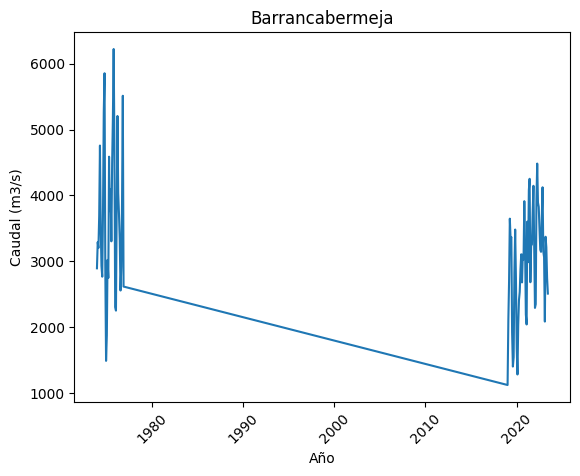

<Figure size 640x480 with 0 Axes>

In [22]:

# Define el rango de filas que deseas graficar
inicio = 0  # Índice de la primera fila a graficar
fin = 90   # Índice de la última fila a graficar

# Extrae las columnas de fecha y caudal dentro del rango especificado
fechas = pd.to_datetime(df['Fecha'][inicio:fin])
caudales = df['Valor'][inicio:fin]

# Grafica los caudales
plt.plot(fechas, caudales)
plt.title('Barrancabermeja')
plt.xlabel('Año')
plt.ylabel('Caudal (m3/s)')
plt.xticks(rotation=45)
plt.show()
plt.savefig(f"caudal- Barrancabermeja", bbox_inches='tight')

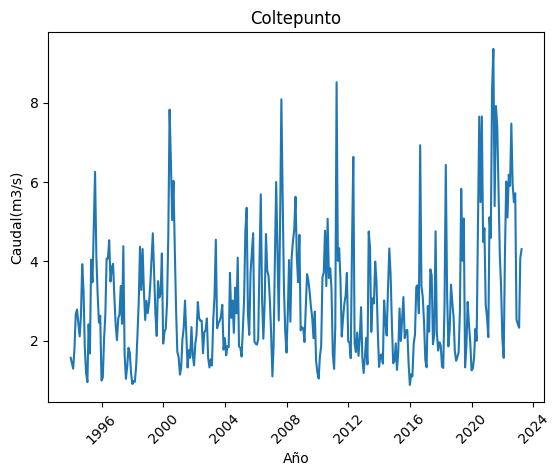

<Figure size 640x480 with 0 Axes>

In [23]:

# Define el rango de filas que deseas graficar
inicio = 90  # Índice de la primera fila a graficar
fin = 441   # Índice de la última fila a graficar

# Extrae las columnas de fecha y caudal dentro del rango especificado
fechas = pd.to_datetime(df['Fecha'][inicio:fin])
caudales = df['Valor'][inicio:fin]

# Grafica los caudales
plt.plot(fechas, caudales)
plt.title('Coltepunto')
plt.xlabel('Año')
plt.ylabel('Caudal(m3/s)')
plt.xticks(rotation=45)
plt.show()
plt.savefig(f"caudal- Coltepuntos", bbox_inches='tight')

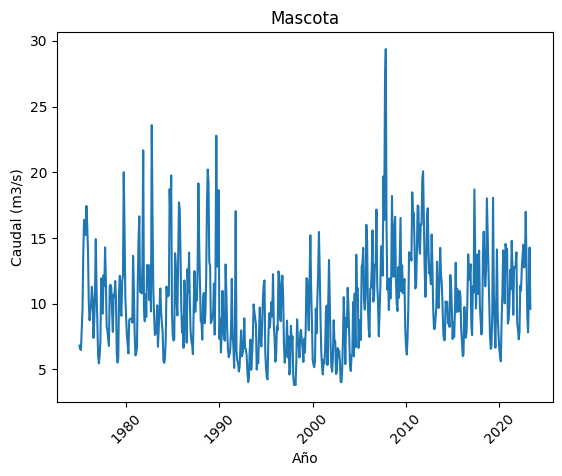

<Figure size 640x480 with 0 Axes>

In [24]:

# Define el rango de filas que deseas graficar
inicio = 441  # Índice de la primera fila a graficar
fin = 1017   # Índice de la última fila a graficar

# Extrae las columnas de fecha y caudal dentro del rango especificado
fechas = pd.to_datetime(df['Fecha'][inicio:fin])
caudales = df['Valor'][inicio:fin]

# Grafica los caudales
plt.plot(fechas, caudales)
plt.title('Mascota')
plt.xlabel('Año')
plt.ylabel('Caudal (m3/s)')
plt.xticks(rotation=45)
plt.show()
plt.savefig(f"caudal- Mascotas", bbox_inches='tight')

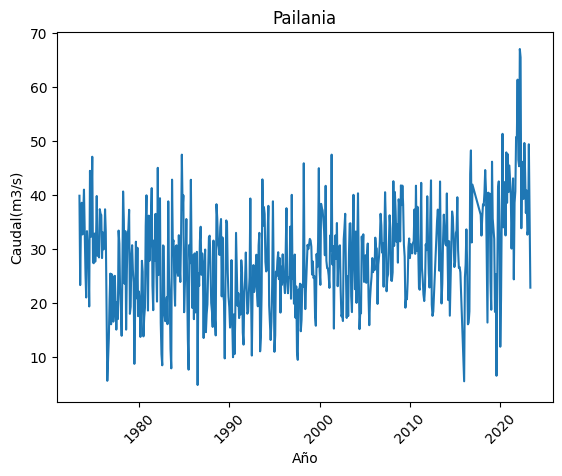

<Figure size 640x480 with 0 Axes>

In [25]:

# Define el rango de filas que deseas graficar
inicio = 1017  # Índice de la primera fila a graficar
fin = 1596   # Índice de la última fila a graficar

# Extrae las columnas de fecha y caudal dentro del rango especificado
fechas = pd.to_datetime(df['Fecha'][inicio:fin])
caudales = df['Valor'][inicio:fin]

# Grafica los caudales
plt.plot(fechas, caudales)
plt.title('Pailania')
plt.xlabel('Año')
plt.ylabel('Caudal(m3/s)')
plt.xticks(rotation=45)
plt.show()
plt.savefig(f"caudal- Pailania", bbox_inches='tight')

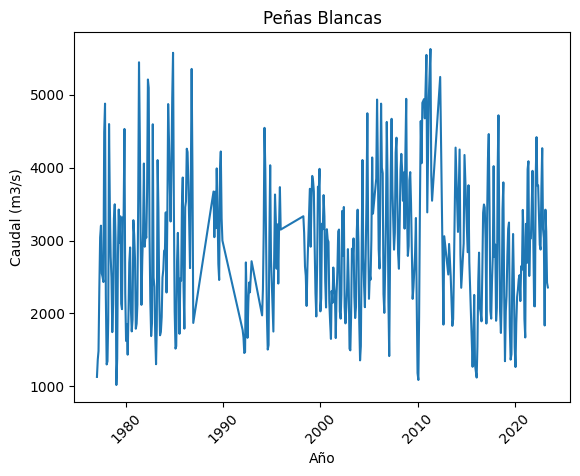

<Figure size 640x480 with 0 Axes>

In [26]:
# Define el rango de filas que deseas graficar
inicio = 1596  # Índice de la primera fila a graficar
fin = 2023   # Índice de la última fila a graficar

# Extrae las columnas de fecha y caudal dentro del rango especificado
fechas = pd.to_datetime(df['Fecha'][inicio:fin])
caudales = df['Valor'][inicio:fin]

# Grafica los caudales
plt.plot(fechas, caudales)
plt.title('Peñas Blancas')
plt.xlabel('Año')
plt.ylabel('Caudal (m3/s)')
plt.xticks(rotation=45)
plt.show()
plt.savefig(f"caudal- peñas Blancas", bbox_inches='tight')

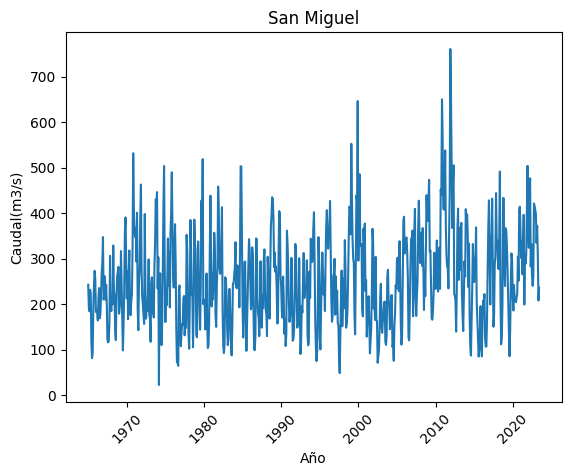

<Figure size 640x480 with 0 Axes>

In [30]:
# Define el rango de filas que deseas graficar
inicio = 2023  # Índice de la primera fila a graficar
fin = 2723   # Índice de la última fila a graficar

# Extrae las columnas de fecha y caudal dentro del rango especificado
fechas = pd.to_datetime(df['Fecha'][inicio:fin])
caudales = df['Valor'][inicio:fin]

# Grafica los caudales
plt.plot(fechas, caudales)
plt.title('San Miguel')
plt.xlabel('Año')
plt.ylabel('Caudal(m3/s)')
plt.xticks(rotation=45)
plt.show()
plt.savefig(f"caudal- San Miguel", bbox_inches='tight')

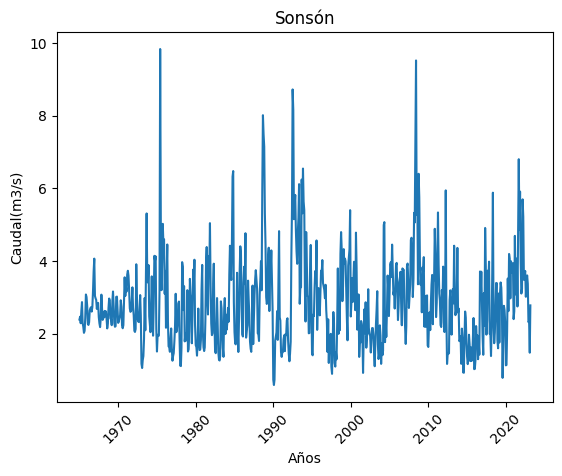

<Figure size 640x480 with 0 Axes>

In [28]:
# Define el rango de filas que deseas graficar
inicio = 2723  # Índice de la primera fila a graficar
fin = 3420   # Índice de la última fila a graficar

# Extrae las columnas de fecha y caudal dentro del rango especificado
fechas = pd.to_datetime(df['Fecha'][inicio:fin])
caudales = df['Valor'][inicio:fin]

# Grafica los caudales
plt.plot(fechas, caudales)
plt.title('Sonsón')
plt.xlabel('Años')
plt.ylabel('Caudal(m3/s)')
plt.xticks(rotation=45)
plt.show()
plt.savefig(f"caudal- Sonson", bbox_inches='tight')

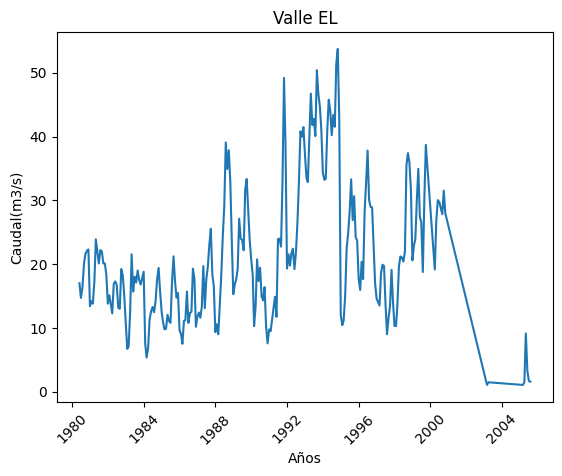

<Figure size 640x480 with 0 Axes>

In [29]:
# Define el rango de filas que deseas graficar
inicio = 3420  # Índice de la primera fila a graficar
fin = 3667   # Índice de la última fila a graficar

# Extrae las columnas de fecha y caudal dentro del rango especificado
fechas = pd.to_datetime(df['Fecha'][inicio:fin])
caudales = df['Valor'][inicio:fin]

# Grafica los caudales
plt.plot(fechas, caudales)
plt.title('Valle EL')
plt.xlabel('Años')
plt.ylabel('Caudal(m3/s)')
plt.xticks(rotation=45)
plt.show()
plt.savefig(f"caudal-Valle", bbox_inches='tight')

